<a href="https://colab.research.google.com/github/Asuskf/intro_macro_python/blob/main/labs/macro_py_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab4

**Objetivo**: Representar de forma gráfica las respuesta del [Lab2](https://github.com/Asuskf/intro_macro_python/blob/main/labs/macro_py_lab2.ipynb)


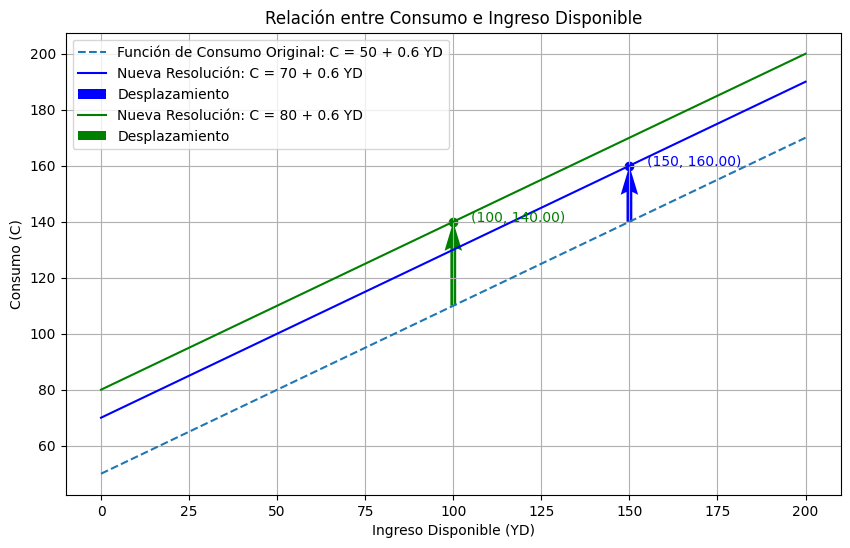

1. Cuando YD es 100, el nivel de consumo es 110.00
2. Si el ingreso disponible aumenta a 100, el aumento en el consumo es 30.00
3. Si el componente autónomo del consumo (c0) cambia a 80, el cambio en el consumo cuando YD es 100 es 20.00


In [22]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_consumo(yd, c0, c1):
    """
    Calcula el consumo utilizando la función de consumo del modelo keynesiano.

    Parámetros:
    yd (float): Ingreso disponible después de impuestos.
    c0 (float): Componente autónomo del consumo.
    c1 (float): Propensión marginal al consumo.

    Returns:
    float: El nivel de consumo calculado.
    """
    consumo = c0 + c1 * yd
    return consumo

# Ejercicio 1: Relación entre Consumo e Ingreso Disponible

# Parámetros originales de la función de consumo
c0_original = 50
c1 = 0.6

# Pregunta 1: Calcular el consumo cuando YD es 100
yd_1 = 100
consumo_1 = calcular_consumo(yd_1, c0_original, c1)

# Pregunta 2: Calcular el aumento en el consumo cuando YD aumenta a 150
yd_nuevo = 150
consumo_nuevo = calcular_consumo(yd_nuevo, c0_original, c1)
aumento_consumo = consumo_nuevo - consumo_1

# Pregunta 3: Cambiar c0 a 70 y calcular el consumo cuando YD es 100
c0_nuevo = 70
consumo_nuevo_c0 = calcular_consumo(yd_1, c0_nuevo, c1)
cambio_consumo_c0 = consumo_nuevo_c0 - consumo_1

# Crear la gráfica para los ejercicios
plt.figure(figsize=(10, 6))
yd_values = np.linspace(0, 200, 100)
consumo_original = [calcular_consumo(yd, c0_original, c1) for yd in yd_values]
plt.plot(yd_values, consumo_original, label=f'Función de Consumo Original: C = {c0_original} + {c1} YD', linestyle='--')

# Parámetros de las nuevas funciones de consumo para cada resolución
resoluciones = [
    {"c0_nuevo": 70, "yd_nuevo": 150, "color": "blue", "label": "Nueva Resolución: C = 70 + 0.6 YD"},
    {"c0_nuevo": 80, "yd_nuevo": 100, "color": "green", "label": "Nueva Resolución: C = 80 + 0.6 YD"}
]

# Graficar las nuevas funciones de consumo y agregar puntos y desplazamientos
for resolucion in resoluciones:
    c0_nuevo = resolucion["c0_nuevo"]
    yd_nuevo = resolucion["yd_nuevo"]
    consumo_nuevo = calcular_consumo(yd_values, c0_nuevo, c1)
    plt.plot(yd_values, consumo_nuevo, color=resolucion["color"], label=resolucion["label"])
    plt.scatter([yd_nuevo], [calcular_consumo(yd_nuevo, c0_nuevo, c1)], color=resolucion["color"], marker='o')
    plt.text(yd_nuevo + 5, calcular_consumo(yd_nuevo, c0_nuevo, c1), f'({yd_nuevo}, {calcular_consumo(yd_nuevo, c0_nuevo, c1):.2f})', color=resolucion["color"])

    # Agregar vector de desplazamiento
    plt.quiver(yd_nuevo, calcular_consumo(yd_nuevo, c0_original, c1), 0, calcular_consumo(yd_nuevo, c0_nuevo, c1) - calcular_consumo(yd_nuevo, c0_original, c1), angles='xy', scale_units='xy', scale=1, color=resolucion["color"], label='Desplazamiento')

plt.xlabel('Ingreso Disponible (YD)')
plt.ylabel('Consumo (C)')
plt.title('Relación entre Consumo e Ingreso Disponible')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir respuestas del Ejercicio 1
print(f"1. Cuando YD es {yd_1}, el nivel de consumo es {consumo_1:.2f}")
print(f"2. Si el ingreso disponible aumenta a {yd_nuevo}, el aumento en el consumo es {aumento_consumo:.2f}")
print(f"3. Si el componente autónomo del consumo (c0) cambia a {c0_nuevo}, el cambio en el consumo cuando YD es {yd_1} es {cambio_consumo_c0:.2f}")
